From the "create_dataset.py" file we obtained a dataframe which contains all the compueted features (sequence and structure information) for each residue of the included ligand-protein complexes retrieved form the PDBind database. In this script the data is preprocessed and cleaned in order to further develop a machine learning-based algorithm for LBSs prediction. 

In [1]:
# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
dataset = pd.read_csv("total.csv", delimiter=',', low_memory=False)

We drop the first column corresponding to the residue name since it does not provide any relevant information for the classification.

In [3]:
# remove residue column
dataset = dataset.drop(columns = ["residue"])

In [4]:
# preview dataset
dataset.head()

,hydrophobicity,polarity,positive,negative,isoelectric point,secondary structure,sasa,A,R,N,...,M,F,P,S,T,W,Y,V,entropy,activity
0,-4.2,-0.41,0.0,0.0,5.97,-,182.08,0,-3,-1,...,-3,-4,-2,1,-1,-3,-3,-3,184.064650,Non-binding
1,-4.2,-0.41,0.0,0.0,5.97,-,182.90,0,-3,-1,...,-3,-4,-3,-1,-2,-3,-4,-4,200.000000,Non-binding
2,38.5,-0.80,0.0,1.0,2.77,-,258.68,-2,-2,1,...,-3,-3,-2,-1,-2,-4,-1,-4,175.112454,Non-binding
3,-10.9,1.09,0.0,0.0,5.96,E,250.54,-1,-3,-3,...,0,-1,-3,-2,0,-3,-2,5,200.000000,Non-binding
4,-10.9,1.09,0.0,0.0,5.96,E,241.66,-1,-3,-4,...,1,-1,-3,-2,-1,-3,-1,4,170.771475,Non-binding


In [5]:
# number of rows and columns in the datasets
print(f"data set shape: {dataset.shape}")

data set shape: (80720, 29)


The dataset contains 80.720 rows, that is the number of residues, and 29 columns, i.e., predictive features. One of these is the target variable: activity.

## Analysis

**We will analyse the following:**
- The target feature
- Feature types (categorical and numerical)
- Missing data

### 1. The target feature

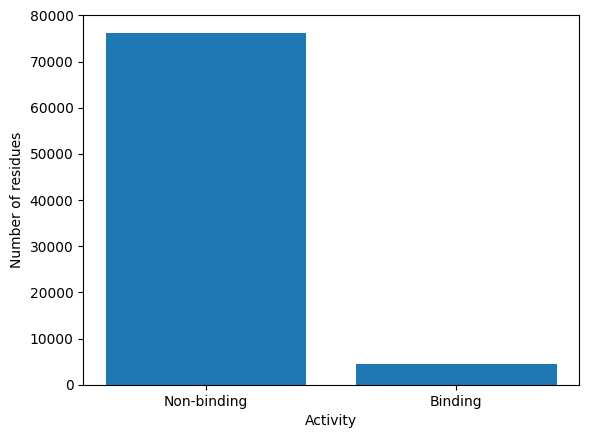

In [6]:
# bar chart to evaluate target distribution
x = ["Non-binding", "Binding"]
height = list(dataset["activity"].value_counts())

plt.bar(
    x= x,
    height= dataset["activity"].value_counts()
)

plt.xlabel("Activity")
plt.ylabel("Number of residues") 
plt.show()

In [7]:
dataset["activity"].value_counts()

activity
Non-binding    76253
Binding         4467
Name: count, dtype: int64

As we can see from the plot and tableabove, the original dataset is imbalanced since it has a disproportionate ratio of samples for each class of the "activity" variable. Therefore, we must solve this and convert the unbalanced dataset to balanced.

### 2. Feature types

In [8]:
# identifying the categorical features by 
# capturing those of type *object*
cat_cols = list(dataset.select_dtypes(include=["object"]).columns)
print(f"length: {len(cat_cols)}\n\n\
columns:\n{cat_cols}")

length: 2

columns:
['secondary structure', 'activity']


Convert them all so that they are of numeric type.

In [9]:
# Convert the 'Non-binding' and 'Binding' labels into binary (0 and 1, respectively)
dataset["activity"] = dataset["activity"].map({'Binding':1,'Non-binding':0}).astype(int)

In [10]:
# Convert DSSP's 8-state assignments into 3-state [C - coil, E - extended (beta-strand), H - helix]
dataset["secondary structure"] = dataset["secondary structure"].map({'-':'C','I':'C','T':'C','S':'C','G':'H','B':'E','H':'H','C':'C','E':'E'})

# Convert the 'C', 'H' and 'E' labels for the secondary structure to numeric(0,1 and 2 respectively)
dataset["secondary structure"] = dataset["secondary structure"].map({'C':0,'H':1,'E':2}).astype(int)

In [11]:
# checking the datatype of features that
# were not of object type
dataset[["hydrophobicity", "polarity", "positive", "negative", 
         "isoelectric point", "sasa", "A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V","entropy"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80720 entries, 0 to 80719
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hydrophobicity     80720 non-null  float64
 1   polarity           80720 non-null  float64
 2   positive           80720 non-null  float64
 3   negative           80720 non-null  float64
 4   isoelectric point  80720 non-null  float64
 5   sasa               80720 non-null  float64
 6   A                  80720 non-null  int64  
 7   R                  80720 non-null  int64  
 8   N                  80720 non-null  int64  
 9   D                  80720 non-null  int64  
 10  C                  80720 non-null  int64  
 11  Q                  80720 non-null  int64  
 12  E                  80720 non-null  int64  
 13  G                  80720 non-null  int64  
 14  H                  80720 non-null  int64  
 15  I                  80720 non-null  int64  
 16  L                  807

The pssm values are int64 and the other 7 features (i.e. hydrophobicity,polarity,positive,negative,isoelectric point,sasa and entropy) are floats64.

In [12]:
# Round the 'entropy' values to 2 decimals
dataset["entropy"] = pd.to_numeric(dataset["entropy"]).round(2)

In [13]:
# preview dataset
dataset.head()

,hydrophobicity,polarity,positive,negative,isoelectric point,secondary structure,sasa,A,R,N,...,M,F,P,S,T,W,Y,V,entropy,activity
0,-4.2,-0.41,0.0,0.0,5.97,0,182.08,0,-3,-1,...,-3,-4,-2,1,-1,-3,-3,-3,184.06,0
1,-4.2,-0.41,0.0,0.0,5.97,0,182.90,0,-3,-1,...,-3,-4,-3,-1,-2,-3,-4,-4,200.00,0
2,38.5,-0.80,0.0,1.0,2.77,0,258.68,-2,-2,1,...,-3,-3,-2,-1,-2,-4,-1,-4,175.11,0
3,-10.9,1.09,0.0,0.0,5.96,2,250.54,-1,-3,-3,...,0,-1,-3,-2,0,-3,-2,5,200.00,0
4,-10.9,1.09,0.0,0.0,5.96,2,241.66,-1,-3,-4,...,1,-1,-3,-2,-1,-3,-1,4,170.77,0


### 3. Missing data

Many machine learning models require us to deal with missing values before passing the training data to it. Understanding the features with missing values could provide us some insight into how to deal with that particular feature (i.e. imputation or deletion).

In [14]:
# Check the presence of NULL values in all columns of the dataframe
print (dataset.isnull().sum())

hydrophobicity         0
polarity               0
positive               0
negative               0
isoelectric point      0
secondary structure    0
sasa                   0
A                      0
R                      0
N                      0
D                      0
C                      0
Q                      0
E                      0
G                      0
H                      0
I                      0
L                      0
K                      0
M                      0
F                      0
P                      0
S                      0
T                      0
W                      0
Y                      0
V                      0
entropy                0
activity               0
dtype: int64


From the table above, we can verify that there is no missing data in any dataframe column. Therefore, the original dataset is clean and it does not need an extensive preprossesing. Nevertheless, there are definitely more analysis that can be performed to better grasp the nature of this data. For instance, we could perform more anaysis to understand the relationship of the features with the target, and we can look at the distributions of the features itself. However, we prefer to carry out that step after fitting some models to the data and understanding why certain features are more important than others.


In [15]:
# save the resulting dataset
dataset.to_csv('cleaned_dataset.csv', index=False)